# LeNet

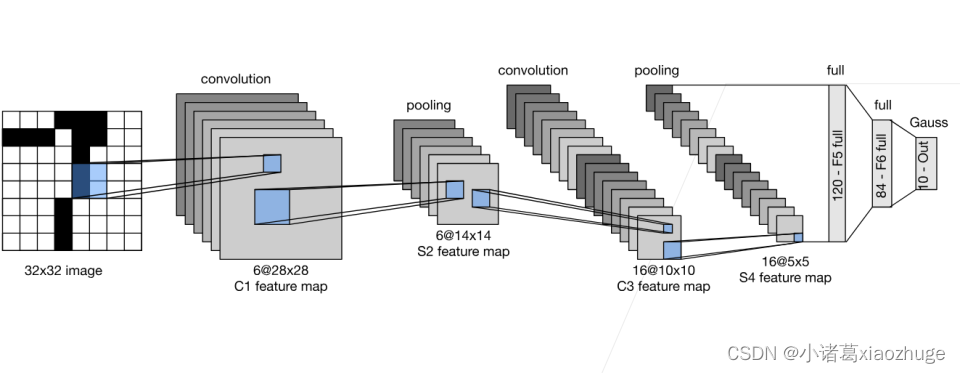

La arquitectura **LeNet-5**, desarrollada por Yann LeCun y su equipo en durante 1988 a 1998, se considera el antecedente directo y fundacional de las redes neuronales convolucionales modernas. Su diseño responde a la necesidad de resolver de manera eficiente el problema del reconocimiento automático de caracteres manuscritos, en particular los dígitos del 0 al 9. Esta arquitectura fue implementada con éxito en sistemas reales para el procesamiento automático de cheques bancarios en Estados Unidos, lo que constituyó una de las primeras aplicaciones industriales del aprendizaje profundo.

## Teoría

### Fundamentos Conceptuales

Antes de la introducción de LeNet-5, el reconocimiento de imágenes se abordaba principalmente mediante redes neuronales densas o perceptrones multicapa. Este enfoque presentaba una limitación estructural fundamental: las redes densas no incorporan de forma explícita la información espacial de los datos. Como consecuencia, pequeñas traslaciones o deformaciones en la imagen de entrada podían provocar fallos significativos en el reconocimiento, ya que la red trataba cada píxel como una característica independiente.

LeNet-5 introduce un cambio conceptual decisivo al incorporar mecanismos que explotan la naturaleza espacial de las imágenes. En particular, establece tres principios que hoy constituyen la base del aprendizaje profundo aplicado a visión artificial. En primer lugar, el uso de **convoluciones** permite extraer características locales relevantes, como bordes y esquinas, preservando la estructura bidimensional de la imagen. En segundo lugar, el **submuestreo** o *pooling* reduce progresivamente la resolución espacial, lo que aporta robustez frente a pequeñas variaciones en la posición de los rasgos. Finalmente, la **compartición de pesos** reduce de forma drástica el número de parámetros entrenables, mejorando la eficiencia computacional y la capacidad de generalización del modelo.

### Descripción Detallada de la Arquitectura

LeNet-5 está compuesta por siete capas entrenables, sin considerar la capa de entrada. El modelo recibe imágenes en escala de grises de **32 × 32 píxeles**, un tamaño ligeramente superior al de los dígitos originales del conjunto MNIST, con el fin de permitir un margen espacial durante las operaciones convolucionales.

La primera capa, denominada **C1**, es una capa convolucional que aplica seis filtros de **5 × 5** píxeles sobre la imagen de entrada. Como resultado, se obtienen seis mapas de características de **28 × 28** píxeles. El objetivo principal de esta capa es detectar patrones elementales, tales como líneas horizontales, verticales y oblicuas, que constituyen la base de representaciones más complejas.

A continuación, la capa **S2** realiza una operación de submuestreo mediante *average pooling*. En esta etapa, cada bloque de **2 × 2** píxeles se reemplaza por su valor promedio, generando seis mapas de características de **14 × 14** píxeles. Este proceso reduce la sensibilidad del modelo a pequeñas variaciones espaciales y contribuye a disminuir la dimensionalidad de los datos.

La segunda capa convolucional, **C3**, aplica dieciséis filtros de **5 × 5** píxeles y produce dieciséis mapas de características de **10 × 10** píxeles. Una característica distintiva de esta capa es que no todos los mapas de entrada se conectan con todos los filtros. Esta conectividad parcial se diseñó para romper la simetría entre neuronas y fomentar el aprendizaje de representaciones más diversas, una decisión relevante en el contexto de las limitaciones computacionales de la época.

Posteriormente, la capa **S4** realiza un nuevo submuestreo similar al de S2, reduciendo cada mapa de características a un tamaño de **5 × 5** píxeles. En este punto, la red dispone de dieciséis mapas compactos que contienen información de alto nivel sobre la imagen de entrada.

La capa **C5** actúa como una transición entre las capas convolucionales y las capas densas. Aplica ciento veinte filtros de **5 × 5** píxeles sobre la entrada de **5 × 5**, lo que produce un vector de **120 unidades**. Debido a que el tamaño del filtro coincide con el tamaño del mapa de entrada, esta capa se comporta de facto como una capa totalmente conectada.

A continuación, la capa **F6** es una capa completamente conectada con **84 unidades**. En el diseño original de LeNet-5 se empleaban funciones de activación como la sigmoide o la tangente hiperbólica, ya que la función ReLU aún no se había popularizado en el ámbito del aprendizaje profundo.

Finalmente, la capa de salida consta de **10 unidades**, correspondientes a las diez clases posibles de dígitos. En su formulación original, LeNet-5 utilizaba funciones de base radial para la clasificación. En implementaciones modernas, esta capa suele reemplazarse por una función **Softmax**, que permite interpretar las salidas como probabilidades normalizadas.

### Características Técnicas Principales

Desde un punto de vista cuantitativo, LeNet-5 cuenta con aproximadamente **60 000 parámetros entrenables**, una cifra muy reducida en comparación con las arquitecturas contemporáneas. El modelo opera sobre imágenes en escala de grises de **32 × 32 píxeles**, emplea funciones de activación suaves como *tanh* o sigmoide y utiliza **average pooling** en lugar de *max pooling*, reflejando las decisiones de diseño predominantes a finales de la década de 1990. El conjunto de datos de referencia para su evaluación fue **MNIST**, que se convirtió posteriormente en un estándar para el análisis comparativo de modelos de clasificación de imágenes.

## Implementación

We begin by importing the necessary Python modules and libraries for building and training our neural network with the MNIST dataset.

In [1]:
# Standard libraries
from typing import Any

# 3pps
import matplotlib.pyplot as plt
import torch
from sklearn.manifold import TSNE
from torch import nn
from torch.utils.data import DataLoader
from torchinfo import summary
from torchvision import datasets, transforms
from tqdm import tqdm

In [2]:
def show_images(images, labels):
    fig, axes = plt.subplots(1, len(images), figsize=(10, 2))
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img.squeeze(), cmap="gray")
        ax.set_title(f"Label: {label}")
        ax.axis("off")
    plt.show()

We start by loading the MNIST dataset, including both the training and test sets. While loading the data, we apply two important transformations. First, each image is converted into a PyTorch tensor, which allows the model to process the data efficiently. Second, we normalize the images using `transforms.Normalize((0.1307,), (0.3081,))`. These numbers represent the mean (`0.1307`) and standard deviation (`0.3081`) of the MNIST dataset, and normalization ensures that the data has a consistent scale. This step is important because it helps the model train more effectively and converge faster. By combining these transformations, we prepare the dataset in a way that is both suitable for the model and optimized for learning.

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)
train_dataset = datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
test_dataset = datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)

In [4]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [5]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

We can use the `DataLoader` class to divide the dataset into batches and shuffle the data efficiently using PyTorch’s built-in functionality. To get started, we first define some global variables or constants that will be used throughout the data loading and training process.

In [6]:
BATCH_SIZE: int = 32

In [7]:
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
)
test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

We can visualize some examples of sample-label pairs from the dataset. If we take one batch from the `DataLoader`, we will get as many samples as the chosen batch size. Each MNIST sample is a grayscale image of size 28 × 28, meaning it has a single channel. By inspecting these batches, we can better understand the structure and format of the data before feeding it into a neural network.

In [8]:
data_iter = iter(train_dataloader)
train_images, train_labels = next(data_iter)
train_images.shape, train_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

We will display the first 10 samples from the dataset. This allows us to quickly inspect the images and their corresponding labels to ensure that the data has been loaded and preprocessed correctly.

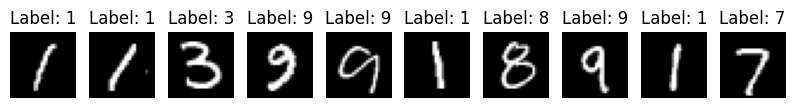

In [9]:
show_images(train_images[:10], train_labels[:10])

Next, we will create a **convolutional neural network (CNN) model**, inspired by Yann LeCun’s **LeNet** architecture, and adapt it for the MNIST dataset. This model will use convolutional layers to automatically extract features from the images, followed by fully connected layers to perform classification.

In [10]:
class LeNet(nn.Module):

    def __init__(self, input_tensor_shape: tuple[int, ...], **kwargs: Any) -> None:

        super().__init__(**kwargs)

        self.input_tensor_shape = input_tensor_shape

        self.model = nn.Sequential(
            nn.Conv2d(
                in_channels=self.input_tensor_shape[0],
                out_channels=16,
                kernel_size=4,
                stride=2,
                padding="valid",
            ),
            nn.BatchNorm2d(num_features=16),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=16,
                out_channels=32,
                kernel_size=4,
                stride=2,
                padding="valid",
            ),
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d(output_size=(1, 1)),
            nn.Flatten(),
            nn.Linear(32, 10),
        )

    def forward(self, input_tensor: torch.Tensor) -> torch.Tensor:

        return self.model(input_tensor)

We define the **optimizer** as **AdamW** and use **cross-entropy** as the **loss function**. AdamW is an adaptive optimizer that combines the benefits of Adam with correct weight decay, helping the model converge efficiently. Cross-entropy loss is well-suited for multi-class classification tasks like MNIST, as it measures the difference between the predicted probabilities and the true class labels.

In [11]:
model = LeNet(input_tensor_shape=(1, 28, 28))
summary(model, input_size=(BATCH_SIZE, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
LeNet                                    [32, 10]                  --
├─Sequential: 1-1                        [32, 10]                  --
│    └─Conv2d: 2-1                       [32, 16, 13, 13]          272
│    └─BatchNorm2d: 2-2                  [32, 16, 13, 13]          32
│    └─ReLU: 2-3                         [32, 16, 13, 13]          --
│    └─Conv2d: 2-4                       [32, 32, 5, 5]            8,224
│    └─BatchNorm2d: 2-5                  [32, 32, 5, 5]            64
│    └─ReLU: 2-6                         [32, 32, 5, 5]            --
│    └─AdaptiveAvgPool2d: 2-7            [32, 32, 1, 1]            --
│    └─Flatten: 2-8                      [32, 32]                  --
│    └─Linear: 2-9                       [32, 10]                  330
Total params: 8,922
Trainable params: 8,922
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 8.06
Input size (MB): 0.10
Forward/backward pas

In [12]:
optimizer = torch.optim.AdamW(params=model.parameters(), lr=1e-3, weight_decay=1e-4)
loss_function = torch.nn.CrossEntropyLoss()

Now, we need to create the **training loop**. This loop will iterate over the dataset for a number of epochs, feeding batches of data through the model, computing the loss, performing backpropagation, and updating the model’s parameters. A well-structured training loop is essential for effectively training the network and monitoring its performance over time.

In [13]:
NUM_EPOCHS: int = 5

Epoch [1/5] Train Loss: 0.9334, Train Acc: 76.77% | Test Loss: 0.4189, Test Acc: 90.49%


Epoch [2/5] Train Loss: 0.3321, Train Acc: 92.07% | Test Loss: 0.2243, Test Acc: 94.45%


Epoch [3/5] Train Loss: 0.2210, Train Acc: 94.38% | Test Loss: 0.1833, Test Acc: 95.19%


Epoch [4/5] Train Loss: 0.1745, Train Acc: 95.46% | Test Loss: 0.1389, Test Acc: 96.30%


Epoch [5/5] Train Loss: 0.1469, Train Acc: 96.10% | Test Loss: 0.1318, Test Acc: 96.39%


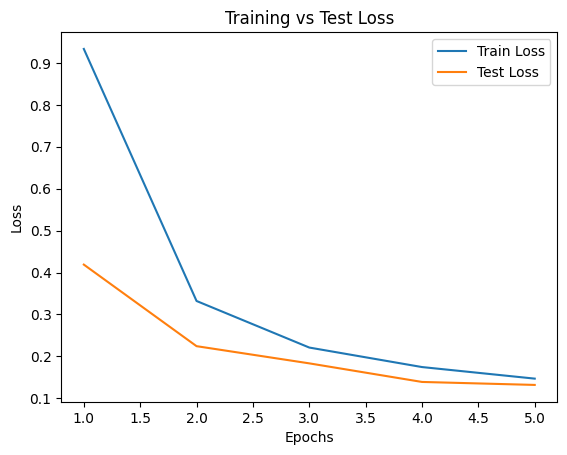

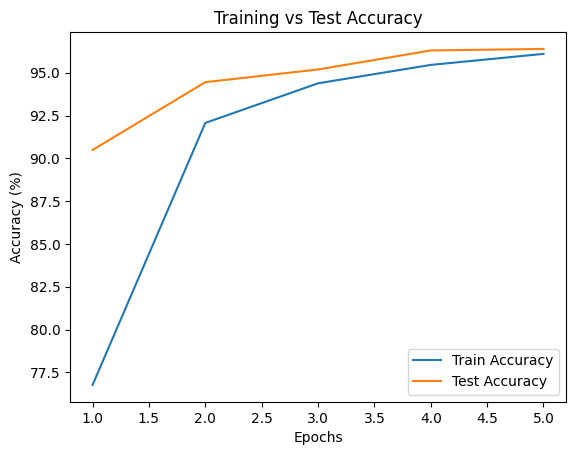

In [14]:
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []

for epoch in range(NUM_EPOCHS):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    train_loop = tqdm(
        train_dataloader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Train]", leave=False
    )

    for batch_image, batch_label in train_loop:

        optimizer.zero_grad()
        outputs = model(batch_image)
        loss = loss_function(outputs, batch_label)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += batch_label.size(0)
        correct += (predicted == batch_label).sum().item()

    train_losses.append(running_loss / len(train_dataloader))
    train_accuracies.append(100 * correct / total)

    model.eval()
    test_loss, correct_test, total_test = 0.0, 0, 0

    test_loop = tqdm(
        test_dataloader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Test]", leave=False
    )

    with torch.no_grad():
        for images, labels in test_loop:
            outputs = model(images)
            loss = loss_function(outputs, labels)

            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_losses.append(test_loss / len(test_dataloader))
    test_accuracies.append(100 * correct_test / total_test)

    print(
        f"Epoch [{epoch+1}/{NUM_EPOCHS}] "
        f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}% "
        f"| Test Loss: {test_losses[-1]:.4f}, Test Acc: {test_accuracies[-1]:.2f}%"
    )

epochs = range(1, NUM_EPOCHS + 1)

plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Test Loss")
plt.legend()
plt.show()

plt.plot(epochs, train_accuracies, label="Train Accuracy")
plt.plot(epochs, test_accuracies, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training vs Test Accuracy")
plt.legend()
plt.show()

Now, we can visualize the data in a lower-dimensional space using **t-SNE**. This technique allows us to project high-dimensional representations—such as the feature outputs from our model—into two or three dimensions, making it easier to observe patterns, clusters, or separations between different classes. Visualizing the data in this way can provide valuable insights into how well the model is learning to distinguish between digits.

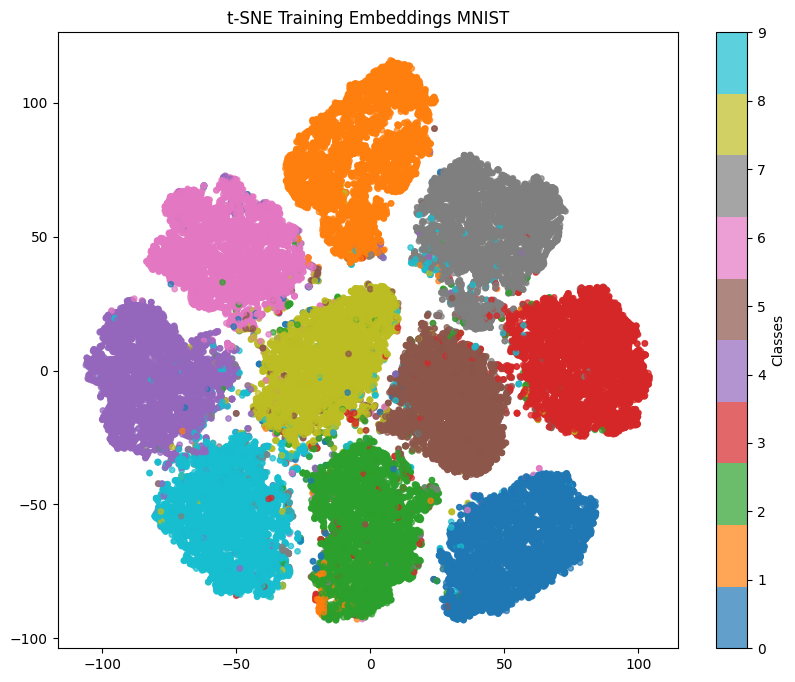

In [15]:
all_labels = []
embeddings = []

model.eval()
with torch.no_grad():
    for batch_image, batch_label in train_dataloader:
        output = model(batch_image)
        embeddings.append(output.cpu())
        all_labels.append(batch_label)

embeddings = torch.cat(embeddings, dim=0)
all_labels = torch.cat(all_labels, dim=0)

X_embedded = TSNE(
    n_components=2, learning_rate="auto", init="random", perplexity=30
).fit_transform(embeddings)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_embedded[:, 0], X_embedded[:, 1], c=all_labels, cmap="tab10", alpha=0.7, s=15
)
plt.colorbar(scatter, ticks=range(10), label="Classes")
plt.title("t-SNE Training Embeddings MNIST")
plt.show()